In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import math


In [7]:
senti = pd.read_csv("senti_clean.csv")

In [8]:
a = senti.actor1.unique()

In [12]:
b = senti.actor2.unique()

In [13]:
c = np.concatenate((a, b))

In [14]:
c = np.unique(c)

In [15]:
d = pd.DataFrame(c, columns = ["actor"])

In [16]:
d

,actor
0,AhnHyoSeop
1,BaeSuzy
2,BangMinAh
3,ChaEunWoo
4,ChaSeungWon
...,...
123,YooAhIn
124,YooInNa
125,YooJun
126,YooSeungHo


In [17]:
d['match'] = np.nan
d['score'] = np.nan
d['linecount'] = np.nan

In [18]:
d

,actor,match,score,linecount
0,AhnHyoSeop,NaN,NaN,NaN
1,BaeSuzy,NaN,NaN,NaN
2,BangMinAh,NaN,NaN,NaN
3,ChaEunWoo,NaN,NaN,NaN
4,ChaSeungWon,NaN,NaN,NaN
...,...,...,...,...
123,YooAhIn,NaN,NaN,NaN
124,YooInNa,NaN,NaN,NaN
125,YooJun,NaN,NaN,NaN
126,YooSeungHo,NaN,NaN,NaN


In [19]:
d['match'] = d.match.astype(str)
d['score'] = d.score.astype(str)
d['linecount'] = d.linecount.astype(str)

In [20]:
maxi = 0

In [21]:
d

,actor,match,score,linecount
0,AhnHyoSeop,nan,nan,nan
1,BaeSuzy,nan,nan,nan
2,BangMinAh,nan,nan,nan
3,ChaEunWoo,nan,nan,nan
4,ChaSeungWon,nan,nan,nan
...,...,...,...,...
123,YooAhIn,nan,nan,nan
124,YooInNa,nan,nan,nan
125,YooJun,nan,nan,nan
126,YooSeungHo,nan,nan,nan


In [22]:
yes = 0
maxi = 0

In [23]:
for j in range(0,128):
    for i in range(0,103):
        if ((d.iloc[j, 0] == senti.iloc[i, 2] or d.iloc[j, 0] == senti.iloc[i, 3]) and senti.iloc[i, 5]>maxi):
            maxi = senti.iloc[i, 5]
            if d.iloc[j, 0] == senti.iloc[i, 2]:
                yes = 1
            if yes == 1:
                d.at[j, 'match'] = senti.iloc[i, 3]
            if yes == 0:
                d.at[j, 'match'] = senti.iloc[i, 2]
            d.at[j, 'score'] = senti.iloc[i, 5]
            d.at[j, 'linecount'] = senti.iloc[i, 4]
        yes = 0
    maxi = 0
            

In [24]:
d = d.sort_values("actor").reset_index().drop("index", 1)

In [25]:
d.score.mean() #needed for dashboard, to classify it as high or low chemistry

0.3044259048098802

In [26]:
d.score.median()#needed for dashboard, to classify it as high or low chemistry

0.29034474206349203

In [27]:
# d.to_csv("dfR.csv")

In [32]:
d

,actor,match,score,linecount
0,AhnHyoSeop,ParkBoYoung,0.25841,6
1,BaeSuzy,LeeJongSuk,0.185402,5
2,BangMinAh,NamgoongMin,0.407018,8
3,ChaEunWoo,MoonGaYoung,0.304908,7
4,ChaSeungWon,LeeSeungGi,0.592857,5
...,...,...,...,...
123,YooAhIn,ImSooJung,0.215341,5
124,YooInNa,JiHyunWoo,0.389189,10
125,YooJun,HeoHyunJun,0.216423,7
126,YooSeungHo,ChaeSooBin,0.193958,6


In [39]:
d.score = d.score.astype('float')

<AxesSubplot:xlabel='score', ylabel='Density'>

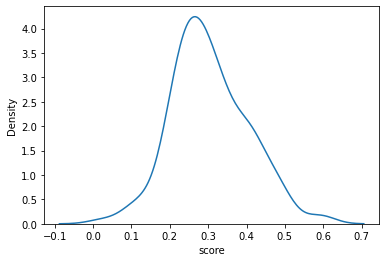

In [40]:
sns.kdeplot(d['score'])

In [43]:
def variance(data, ddof=0):
    n = len(data)
    mean = sum(data) / n
    return sum((x - mean) ** 2 for x in data) / (n - ddof)


def stdev(data):
    var = variance(data)
    std_dev = math.sqrt(var)
    return std_dev

In [46]:
a = stdev(d.score)

In [49]:
d.score.mean()-a

0.20544442818348568

In [50]:
d.score.mean()+a

0.4034073814362747

This represents the mid chemistry level whereas anything below 20.54% is considered low and anything above 40.34% is considered high.

In [84]:
senti.actor1match = senti.actor1match.astype('string')
senti.actor2match = senti.actor2match.astype('string')

In [92]:
actor1mat = senti.dropna(subset = ['actor1match'])

In [94]:
actor1mat

,Unnamed: 0,pair,actor1,actor2,lineCount,score,actor1match,actor2match
0,0,"('ChaSeungWon', 'LeeSeungGi')",ChaSeungWon,LeeSeungGi,5,0.592857,"SungHyuk, BaeSooBin",<NA>
1,1,"('JungHaeIn', 'SonYeJin')",JungHaeIn,SonYeJin,9,0.501087,ParkJiBin,"BangMinAh, KimYooJung"
2,2,"('YoonHyunMin', 'GoSungHee')",YoonHyunMin,GoSungHee,5,0.487549,"JangKiYong, Chani",SeoYeJi
3,3,"('SongJiHyo', 'ChoiJinHyuk')",SongJiHyo,ChoiJinHyuk,5,0.478333,ShinDongMi,LeeHyunJin
5,5,"('YeonWooJin', 'ParkHyeSoo')",YeonWooJin,ParkHyeSoo,5,0.449259,LeeJoonHyuk,"KimSeJeong, HanJiMin"
...,...,...,...,...,...,...,...,...
95,95,"('KimMyungSoo', 'ShinYeEun')",KimMyungSoo,ShinYeEun,5,0.117708,JungYongHwa,YooInYoung
97,97,"('GoAhRa', 'ParkSeoJoon')",GoAhRa,ParkSeoJoon,6,0.110000,KangYeNa,ChoiTaeJoon
100,100,"('ShinHyeSun', 'LeeJongSuk')",ShinHyeSun,LeeJongSuk,5,0.076746,YooInNa,<NA>
101,101,"('KimGoEun', 'ParkHaeJin')",KimGoEun,ParkHaeJin,8,0.025000,"JoHyeJoo, ChoiARa, LeeSooJi, KimSeulGi, KimHye...",One


In [132]:
senti.actor1.unique()

array(['ChaSeungWon', 'JungHaeIn', 'YoonHyunMin', 'SongJiHyo',
       'JungEunJi', 'YeonWooJin', 'ParkMinYoung', 'JangKiYong',
       'ChaeSooBin', 'GongYoo', 'HwangJungEum', 'NamgoongMin',
       'KimSeJeong', 'KimYooJung', 'JiHyunWoo', 'HyunBin',
       'ChunJungMyung', 'WooDoHwan', 'Uee', 'KimNamGil', 'JungSoMin',
       'LeeJoonGi', 'LeeSungKyung', 'LeeYooBi', 'KimJiWon', 'ParkBoYoung',
       'LeeDongWook', 'LeeJunHo', 'LeeSeungGi', 'ChaEunWoo', 'ShinYeEun',
       'LeeJeHoon', 'IU', 'LeeJongSuk', 'ShinHyeSun', 'SoJiSub',
       'JooJiHoon', 'ShinMinAh', 'JunJiHyun', 'HanGiChan', 'KimDongWook',
       'Rain', 'KimJaeWook', 'MoonChaeWon', 'GongHyoJin', 'SongHyeKyo',
       'JiChangWook', 'ShinSeKyung', 'SeoInGuk', 'KwonNaRa', 'RoWoon',
       'KimSooHyun', 'GongSeungYeon', 'JungYongHwa', 'KimYoungKwang',
       'OkTaecYeon', 'HanGroo', 'TakWooSuk', 'LeeByungHun', 'ParkYooChun',
       'JiSung', 'SeoKangJoon', 'HeoHyunJun', 'KimSoHyun', 'ImSooJung',
       'OhYeonSeo', 'HanHyoJoo', 

In [105]:
ac = actor1mat.actor1match.str.split(',').tolist()

In [106]:
ac = pd.DataFrame(ac, index=actor1mat.actor1).stack()

In [108]:
ac = ac.reset_index()[[0, 'actor1']] # var1 variable is currently labeled 0
ac.columns = ['new', 'facialmatched'] # renaming var1

In [109]:
ac

,new,facialmatched
0,SungHyuk,ChaSeungWon
1,BaeSooBin,ChaSeungWon
2,ParkJiBin,JungHaeIn
3,JangKiYong,YoonHyunMin
4,Chani,YoonHyunMin
...,...,...
117,ChoiARa,KimGoEun
118,LeeSooJi,KimGoEun
119,KimSeulGi,KimGoEun
120,KimHyeJoon,KimGoEun


In [110]:
actor2mat = senti.dropna(subset = ['actor2match'])

In [111]:
ac2 = actor2mat.actor2match.str.split(',').tolist()

In [112]:
ac2 = pd.DataFrame(ac2, index=actor2mat.actor2).stack()

In [113]:
ac2 = ac2.reset_index()[[0, 'actor2']] # var1 variable is currently labeled 0
ac2.columns = ['new', 'facialmatched'] # renaming var1

In [119]:
fin = pd.concat([ac,ac2],axis = 0)

In [217]:
unique = fin.drop_duplicates('new')

In [139]:
c

array(['AhnHyoSeop', 'BaeSuzy', 'BangMinAh', 'ChaEunWoo', 'ChaSeungWon',
       'ChaeSooBin', 'ChoiJinHyuk', 'ChoiKangHee', 'ChunJungMyung',
       'GoAhRa', 'GoSungHee', 'GongHyoJin', 'GongSeungYeon', 'GongYoo',
       'HaJiWon', 'HanGiChan', 'HanGroo', 'HanHyoJoo', 'HanJiMin',
       'HeoHyunJun', 'HwangInYeop', 'HwangJungEum', 'HyunBin', 'IU',
       'ImShiWan', 'ImSooJung', 'ImYoonAh', 'JangEuiSoo', 'JangKiYong',
       'JiChangWook', 'JiHyunWoo', 'JiSung', 'JinKiJoo', 'JoBoAh',
       'JoInSung', 'JoJungSuk', 'JooJiHoon', 'Joy', 'JunJiHyun',
       'JungEunJi', 'JungHaeIn', 'JungSoMin', 'JungYongHwa', 'KimAhJoong',
       'KimDaMi', 'KimDongWook', 'KimGoEun', 'KimHeeAe', 'KimHyeSoo',
       'KimHyeYoon', 'KimJaeWook', 'KimJiSoo', 'KimJiWon', 'KimJungHyun',
       'KimMyungSoo', 'KimNamGil', 'KimSeJeong', 'KimSoHyun',
       'KimSooHyun', 'KimTaeRi', 'KimYooJung', 'KimYoungKwang', 'Krystal',
       'KwonNaRa', 'LeeBoYoung', 'LeeByungHun', 'LeeDongWook',
       'LeeJeHoon', 'LeeJong

In [145]:
c

array(['AhnHyoSeop', 'BaeSuzy', 'BangMinAh', 'ChaEunWoo', 'ChaSeungWon',
       'ChaeSooBin', 'ChoiJinHyuk', 'ChoiKangHee', 'ChunJungMyung',
       'GoAhRa', 'GoSungHee', 'GongHyoJin', 'GongSeungYeon', 'GongYoo',
       'HaJiWon', 'HanGiChan', 'HanGroo', 'HanHyoJoo', 'HanJiMin',
       'HeoHyunJun', 'HwangInYeop', 'HwangJungEum', 'HyunBin', 'IU',
       'ImShiWan', 'ImSooJung', 'ImYoonAh', 'JangEuiSoo', 'JangKiYong',
       'JiChangWook', 'JiHyunWoo', 'JiSung', 'JinKiJoo', 'JoBoAh',
       'JoInSung', 'JoJungSuk', 'JooJiHoon', 'Joy', 'JunJiHyun',
       'JungEunJi', 'JungHaeIn', 'JungSoMin', 'JungYongHwa', 'KimAhJoong',
       'KimDaMi', 'KimDongWook', 'KimGoEun', 'KimHeeAe', 'KimHyeSoo',
       'KimHyeYoon', 'KimJaeWook', 'KimJiSoo', 'KimJiWon', 'KimJungHyun',
       'KimMyungSoo', 'KimNamGil', 'KimSeJeong', 'KimSoHyun',
       'KimSooHyun', 'KimTaeRi', 'KimYooJung', 'KimYoungKwang', 'Krystal',
       'KwonNaRa', 'LeeBoYoung', 'LeeByungHun', 'LeeDongWook',
       'LeeJeHoon', 'LeeJong

In [161]:
unique = unique.reset_index().drop('index', 1)

In [191]:
unique.new = unique.new.str.strip()

In [194]:
unique = unique[-unique.new.isin(c)]

In [201]:
unique = unique.sort_values('new').reset_index()

In [204]:
unique = unique.drop('index', 1)

In [249]:
unique.new = unique.new.str.strip()

/Users/valencialie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [251]:
listA = unique.new.to_list()
actor = pd.read_csv("actor.csv")

In [253]:
actress = pd.read_csv("actress.csv")

In [254]:
actor = actor[actor.Actor.isin(listA)].drop_duplicates("Actor")

In [255]:
actress = actress[actress.Actor.isin(listA)].drop_duplicates("Actor")

In [258]:
final = pd.concat([actor, actress], 0).sort_values("Actor").reset_index().drop("index", 1)

In [259]:
final['percentage_similarity'] = (1-final.Least_Array_Diff)*100

In [261]:
final

,Unnamed: 0,Actor,Least_Array_Diff,Best_Match_Actor,percentage_similarity
0,172,AhnJiHyun,0.329938,KimHyeYoon,67.006230
1,34,BaeDaBin,0.258346,ShinSeKyung,74.165398
2,478,BaeInHyuk,0.320975,ParkYooChun,67.902458
3,183,BaeSooBin,0.347607,ChaSeungWon,65.239292
4,487,Chani,0.412719,YoonHyunMin,58.728135
...,...,...,...,...,...
130,278,YoonSangHoon,0.272282,Rain,72.771752
131,191,YoonSoHee,0.251428,ShinSeKyung,74.857181
132,328,YoonYeJoo,0.313338,KimSoHyun,68.666178
133,386,Yura,0.293289,ShinSeKyung,70.671099


In [263]:
final = final.drop("Unnamed: 0", 1)

<AxesSubplot:xlabel='percentage_similarity', ylabel='Density'>

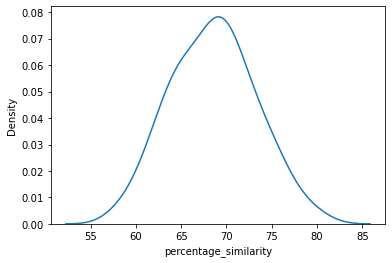

In [264]:
sns.kdeplot(final.percentage_similarity)

In [265]:
std = stdev(final.percentage_similarity)

In [266]:
mean = final.percentage_similarity.mean()

In [267]:
mean-std

63.85877472210949

In [268]:
mean+std

73.20422680461714